# Read Csv

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# check for missing

In [3]:
missing = data.isnull().sum()
missing

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# splitting data and dummy it

In [4]:
x = data.iloc[:,0:10]
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [5]:
1x = pd.get_dummies(x)
x

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,0,1


In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

x = imputer.fit_transform(x)

x

array([[65.  ,  0.7 ,  0.1 , ...,  0.9 ,  1.  ,  0.  ],
       [62.  , 10.9 ,  5.5 , ...,  0.74,  0.  ,  1.  ],
       [62.  ,  7.3 ,  4.1 , ...,  0.89,  0.  ,  1.  ],
       ...,
       [52.  ,  0.8 ,  0.2 , ...,  1.  ,  0.  ,  1.  ],
       [31.  ,  1.3 ,  0.5 , ...,  1.  ,  0.  ,  1.  ],
       [38.  ,  1.  ,  0.3 , ...,  1.5 ,  0.  ,  1.  ]])

# clustering

In [8]:
from sklearn.cluster import KMeans


In [9]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters= i)
    model.fit(x)
    WCSS.append(model.inertia_)

In [10]:
WCSS

[102521520.67088552,
 64015249.97844358,
 43193749.83935908,
 26446021.49121122,
 21082806.93315928,
 14458209.347924158,
 11790706.11792416,
 10022183.549732411,
 8635704.305803044,
 7375448.766555552]

In [11]:
import matplotlib.pyplot as plt


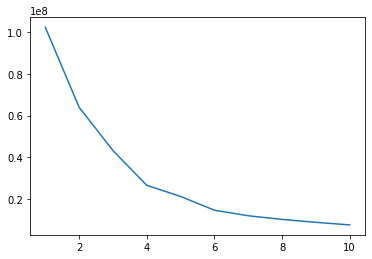

In [12]:
plt.plot(range(1,11),WCSS)

In [13]:
plt.show()

# apply the k mean clustering to the model

In [14]:
model = KMeans(n_clusters=4)
model.fit(x)

KMeans(n_clusters=4)

In [15]:
y = model.fit_predict(x)
y

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,